<a href="https://colab.research.google.com/github/MykolaKud/python_for_ds_tasks/blob/main/%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_4_%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn as sns

In [3]:
data_path = 'drive/MyDrive/data_csv/yulu_rental.csv'
df = pd.read_csv(data_path)

In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


1. Давайте проаналізуємо як впливає швидкість вітру на загальну кількість casual оренди велосипедів

In [12]:
df_casual_not_zero = df[df['casual'] > 0]

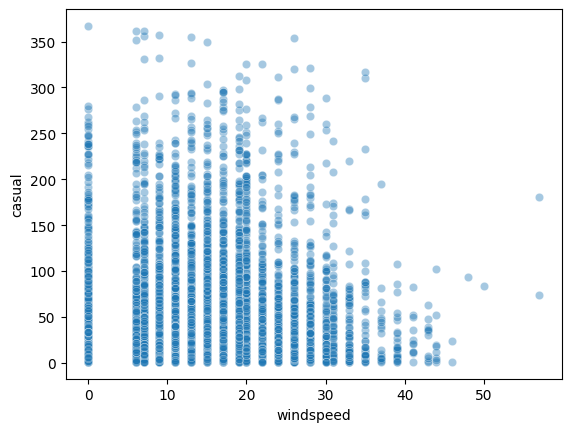

In [16]:
sns.scatterplot(data = df_casual_not_zero, x='windspeed', y='casual', alpha=0.4);

2. Давайте проаналізуємо як сезонність впливає на кількість casual оренди велосипедів

In [30]:
season_group = df.groupby(by='season')
df_season_casual_group = season_group['casual'].sum()

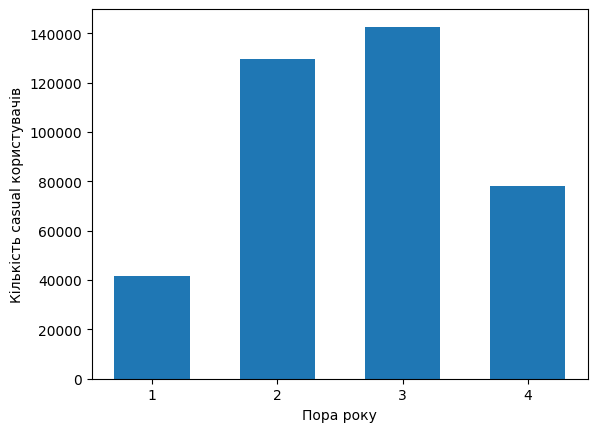

In [44]:
x = df_season_casual_group.index
y = df_season_casual_group.values
plt.bar(x, y, width=0.6)
plt.xticks(ticks=x, labels=[str(i) for i in x])
plt.xlabel('Пора року')
plt.ylabel('Кількість casual користувачів');


3. Давайте проаналізуємо в який час доби зростає кількість оренди велосипедів в різні сезони

In [51]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [52]:
df['hour'] = df['datetime'].dt.hour

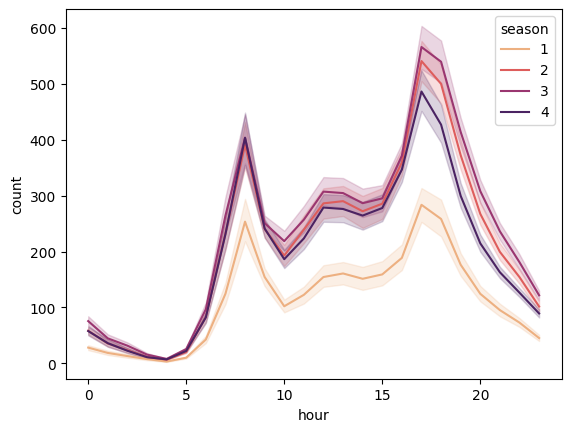

In [67]:
sns.lineplot(df, x='hour', y='count', hue='season', palette='flare');